In [2]:
# wkt : 40 menit
# forgot : -
# improve : kalau data linear regression (target = angka eksplisit)
#  kalau data klasifikasi (target = category)
# top 5 feature sblm split data (numeric)
# dataset = calories

In [3]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, classification_report, accuracy_score

In [4]:
# 1. load dataset

data = pd.read_csv('Calories.csv')

data.head(5)


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [5]:
# describe general
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
data.select_dtypes(include=['float64', 'int64']).describe() # numerical

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [7]:
# categorical
data.select_dtypes(include=['object']).describe()

,Gender
count,15000
unique,2
top,female
freq,7553


In [8]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

### 2. EDA

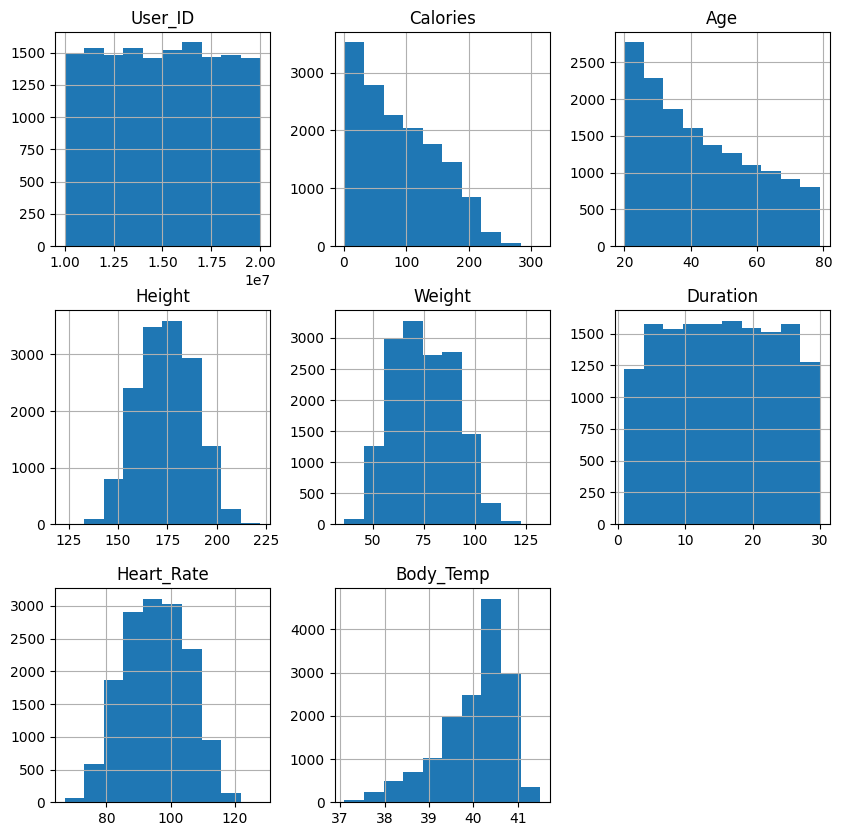

In [9]:
# numeric
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

data[numerical_cols].hist(bins=10, figsize=(10,10))

plt.show()

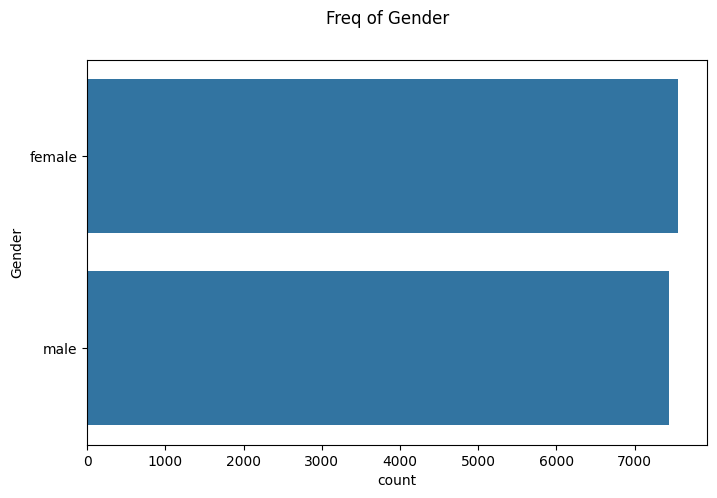

In [10]:
# categorical
categorical_cols = data.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8,5))

    sns.countplot(y=data[col], order=data[col].value_counts().index)

    plt.suptitle(f'Freq of {col}')
    plt.show()


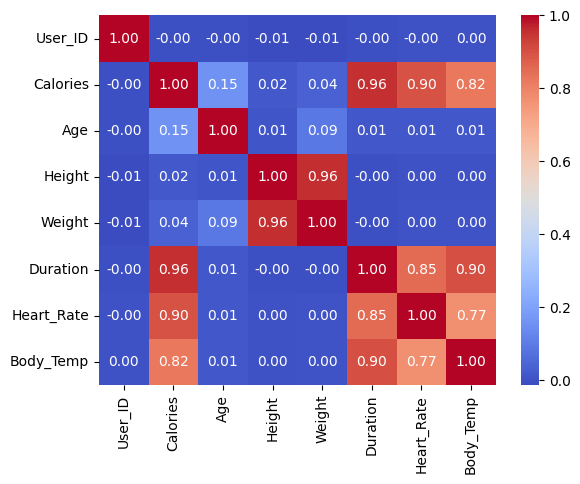

In [11]:
# correlation

corr_matrix = data[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

<Axes: >

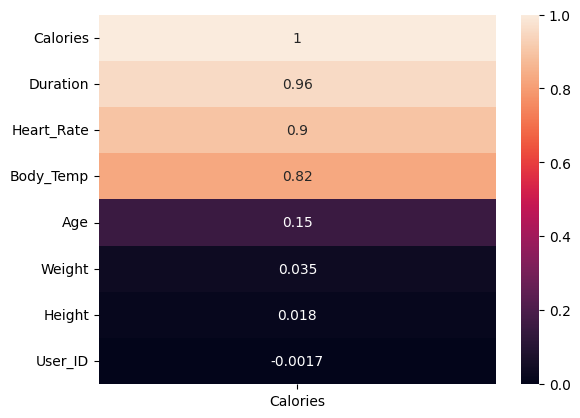

In [12]:
corr_target = corr_matrix['Calories'].sort_values(ascending=False).head(10)

sns.heatmap(corr_target.to_frame(), annot=True)

### 3. preprocessing

In [13]:
# missing val
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [14]:
data.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [15]:
# numerical
x_num = data.select_dtypes(include=['float64', 'int64'])

data.fillna(x_num.mean(), inplace=True)
data.head(5)

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


In [16]:
data.select_dtypes(include=['object']).head(5)

,Gender
0,male
1,female
2,male
3,female
4,female


In [17]:
# categorical
x_category = data.select_dtypes(include=['object'])

for col in x_category:
    mode_val = data[col].mode()[0]

    data[col] = data[col].fillna(mode_val)

data.select_dtypes(include=['object']).head(5)

,Gender
0,male
1,female
2,male
3,female
4,female


In [18]:
data.isnull().sum()

User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

In [19]:
# drop kolom not important
data = data.drop(columns='User_ID')

### 4. split & scale

In [20]:
top5= corr_matrix['Calories'].drop('Calories').abs().sort_values(ascending=False).head(5).index.tolist()
top5

['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight']

In [21]:
# x=data.drop(columns='Calories')
# y=data['Calories']

# top 5 feature

x=data[top5]
y=data['Calories']

In [22]:
x.columns

Index(['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight'], dtype='object')

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

array([[<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>],
       [<Axes: title={'center': 'Body_Temp'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

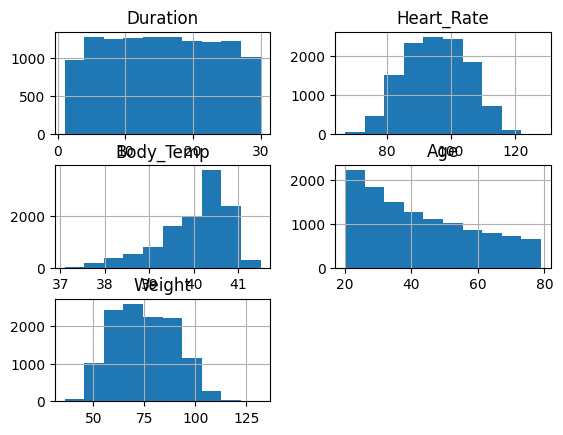

In [24]:
x_train.hist()

In [25]:
label = LabelEncoder()
std = StandardScaler()
minmax = MinMaxScaler()

In [26]:
x_train.select_dtypes(include='object').head(5)

""
9839
9680
7093
11293
820


In [27]:
# label

# category = data.select_dtypes(include='object').columns

# for col in category:
#     x_train[col] = label.fit_transform(x_train[col])
#     x_test[col] = label.transform(x_test[col])

# x_train['Gender']

In [28]:
x_train.head(5)

,Duration,Heart_Rate,Body_Temp,Age,Weight
9839,7.0,81.0,39.5,37,77.0
9680,26.0,110.0,40.5,23,87.0
7093,12.0,88.0,40.1,33,77.0
11293,9.0,77.0,39.5,66,54.0
820,5.0,90.0,39.0,32,49.0


In [29]:
x_train.columns

Index(['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight'], dtype='object')

In [30]:
# numerical 
# bell curve(std) -height, weight, duration, heart_rate
# minmax - age, body_temp, user_id

# std
bell =[ 'Weight', 'Duration','Heart_Rate']

for col in bell:
    x_train[col] = std.fit_transform(x_train[[col]])
    x_test[col] = std.transform(x_test[[col]])

x_train.head(5)

,Duration,Heart_Rate,Body_Temp,Age,Weight
9839,-1.021889,-1.517377,39.5,37,0.139551
9680,1.266663,1.522425,40.5,23,0.805955
7093,-0.419638,-0.783631,40.1,33,0.139551
11293,-0.780988,-1.936660,39.5,66,-1.393179
820,-1.262789,-0.573990,39.0,32,-1.726381


In [31]:
# minmax - 
kolom= ['Age','Body_Temp']

for col in kolom:
    x_train[col] = minmax.fit_transform(x_train[[col]])
    x_test[col] = minmax.transform(x_test[[col]])

x_train.head(5)

,Duration,Heart_Rate,Body_Temp,Age,Weight
9839,-1.021889,-1.517377,0.545455,0.288136,0.139551
9680,1.266663,1.522425,0.772727,0.050847,0.805955
7093,-0.419638,-0.783631,0.681818,0.220339,0.139551
11293,-0.780988,-1.936660,0.545455,0.779661,-1.393179
820,-1.262789,-0.573990,0.431818,0.203390,-1.726381


array([[<Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Heart_Rate'}>],
       [<Axes: title={'center': 'Body_Temp'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Weight'}>, <Axes: >]], dtype=object)

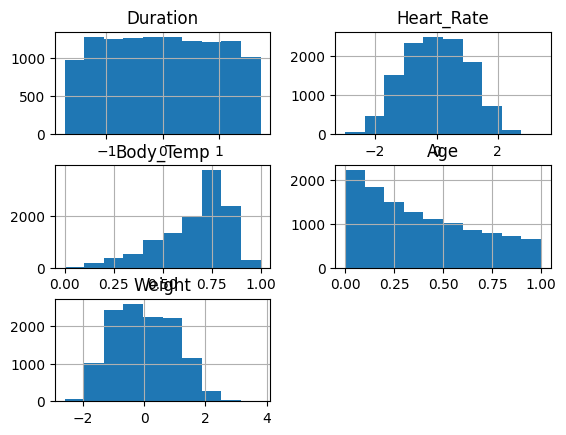

In [32]:
x_train.hist()

### 5. model & eval

In [33]:
Linear = LinearRegression()
LR = LogisticRegression()
NB = GaussianNB()

In [34]:
Linear.fit(x_train, y_train)

LinearRegression()

In [35]:
LR.fit(x_train, y_train)

LogisticRegression()

In [36]:
NB.fit(x_train, y_train)

GaussianNB()

In [37]:
# predict
y_predL = Linear.predict(x_test)
y_predLR = LR.predict(x_test)
y_predNB = NB.predict(x_test)

In [38]:
Linear.score(x_test, y_test)

0.9671243365344782

In [39]:
print(f"MSE : {mean_squared_error(y_test, y_predL)}")
print(f"RMSE : {root_mean_squared_error(y_test, y_predL)}")
print(f"r2 : {r2_score(y_test, y_predL)}")

MSE : 132.67932242583203
RMSE : 11.518651067978057
r2 : 0.9671243365344782


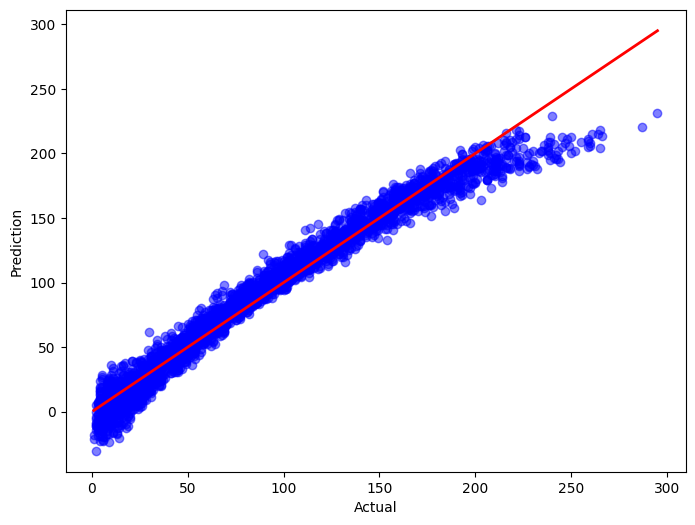

In [43]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predL, alpha=0.5, color='blue')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [41]:
reportLR = classification_report(y_test, y_predLR)

print(reportLR)

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00        10
         3.0       0.27      0.33      0.30        18
         4.0       0.28      0.74      0.41        23
         5.0       0.00      0.00      0.00        18
         6.0       0.00      0.00      0.00        23
         7.0       0.19      0.55      0.28        31
         8.0       0.04      0.09      0.05        23
         9.0       0.00      0.00      0.00        33
        10.0       0.00      0.00      0.00        21
        11.0       0.04      0.11      0.06        28
        12.0       0.20      0.08      0.11        26
        13.0       0.11      0.28      0.15        29
        14.0       0.00      0.00      0.00        27
        15.0       0.03      0.05      0.03        22
        16.0       0.00      0.00      0.00        18
        17.0       0.03      0.09      0.05        22
        18.0       0.00    

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [42]:
reportNB = classification_report(y_test, y_predNB)

print(reportNB)

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         2
         2.0       0.75      0.30      0.43        10
         3.0       0.43      0.17      0.24        18
         4.0       0.40      0.83      0.54        23
         5.0       0.10      0.06      0.07        18
         6.0       0.10      0.04      0.06        23
         7.0       0.30      0.68      0.42        31
         8.0       0.06      0.09      0.07        23
         9.0       0.08      0.06      0.07        33
        10.0       0.00      0.00      0.00        21
        11.0       0.20      0.32      0.24        28
        12.0       0.00      0.00      0.00        26
        13.0       0.08      0.17      0.11        29
        14.0       0.18      0.07      0.11        27
        15.0       0.17      0.27      0.21        22
        16.0       0.14      0.06      0.08        18
        17.0       0.17      0.09      0.12        22
        18.0       0.00    

c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\graze\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 